In [1]:
#the data comes from this website https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cols = 'frequency attack_angle chord_length velocity thickness sound_level'.split()
df = pd.read_table('airfoil_self_noise.dat', header = None, names=cols)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   frequency     1503 non-null   int64  
 1   attack_angle  1503 non-null   float64
 2   chord_length  1503 non-null   float64
 3   velocity      1503 non-null   float64
 4   thickness     1503 non-null   float64
 5   sound_level   1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [4]:
df.describe()

,frequency,attack_angle,chord_length,velocity,thickness,sound_level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [5]:
X = df.iloc[:,0:5]
y = df.iloc[:,5:6]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

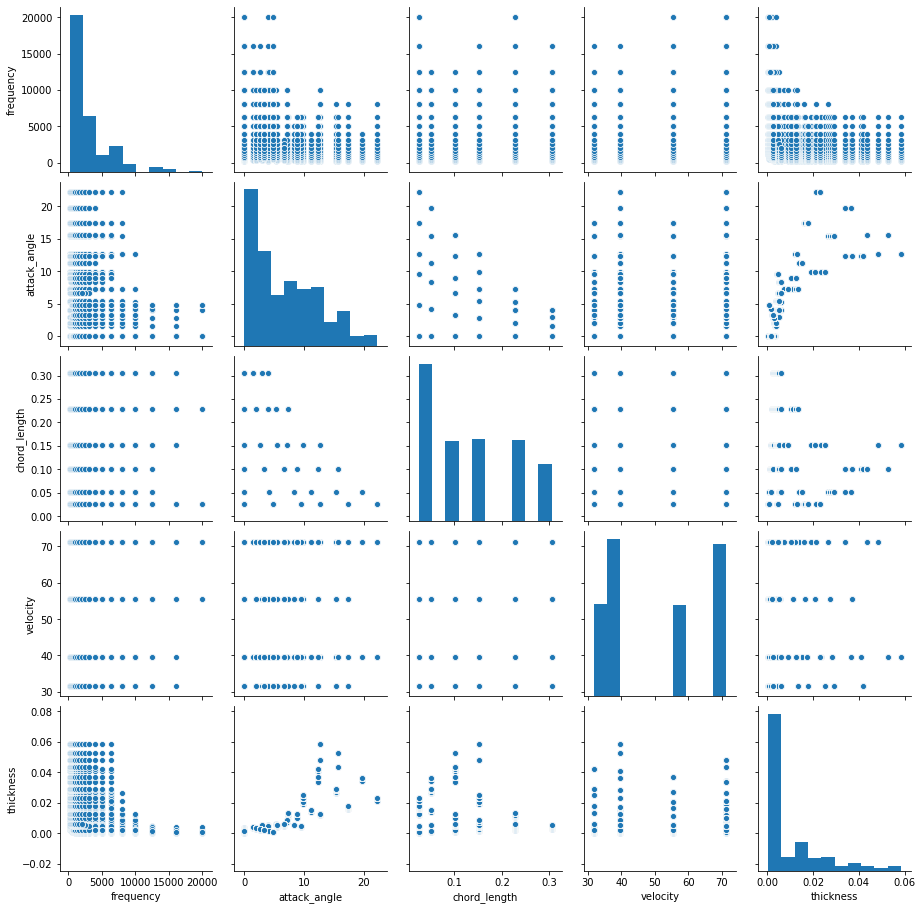

In [7]:
sns.pairplot(X)

In [8]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha = 0.01).fit(X_train, y_train)

print(f'The training set score of the model is {round(reg.score(X_train, y_train), 2)}')
print(f'The test set score of the model is {round(reg.score(X_test, y_test), 2)}')

The training set score of the model is 0.52
The test set score of the model is 0.51


In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

print(f'The training set score of the model is {round(reg.score(X_train, y_train), 2)}')
print(f'The test set score of the model is {round(reg.score(X_test, y_test), 2)}')

The training set score of the model is 0.52
The test set score of the model is 0.51


In [10]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 1000, max_features = 'log2').fit(X_train, y_train.values.ravel())

print(f'The training set score of the model is {round(reg.score(X_train, y_train), 2)}')
print(f'The test set score of the model is {round(reg.score(X_test, y_test), 2)}')

The training set score of the model is 0.99
The test set score of the model is 0.93


In [11]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 10000).fit(X_train, y_train.values.ravel())
    
print(f'The training set score of the model is {round(reg.score(X_train, y_train), 2)}')
print(f'The test set score of the model is {round(reg.score(X_test, y_test), 2)}')

The training set score of the model is 1.0
The test set score of the model is 0.95


In [12]:
#this was much faster than GradientBoostingRegressor from SKLearn
from xgboost.sklearn import XGBRegressor

xgb_model = XGBRegressor(learning_rate = 0.1, n_estimators = 1000).fit(X_train, y_train)

print(f'The training set score of the model is {round(xgb_model.score(X_train, y_train), 2)}')
print(f'The test set score of the model is {round(xgb_model.score(X_test, y_test), 2)}')

The training set score of the model is 1.0
The test set score of the model is 0.95


In [13]:
#using GridSearchCV for cross validation and hyperparamter tuning for the above model

from sklearn.model_selection import GridSearchCV

parameters_grid = {
    'n_estimators': [100, 1000, 10000],
    'learning_rate': [0.001, 0.1, 0.2]
}

reg = GridSearchCV(estimator = XGBRegressor(),
                   param_grid = parameters_grid,
                   cv = 10,
                   n_jobs = -1)

reg.fit(X_train, y_train)

#best score of accuracy
print('Best score:', reg.best_score_)

# View the best parameters for the model found using grid search
print('Best Number of Trees:',reg.best_estimator_.n_estimators) 
print('Best Learning Rate:',reg.best_estimator_.learning_rate)

Best score: 0.9561061928341529
Best Number of Trees: 10000
Best Learning Rate: 0.1


In [14]:
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error

xgb_model = XGBRegressor(learning_rate = reg.best_estimator_.learning_rate,
                         n_estimators = reg.best_estimator_.n_estimators).fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(f'The R2 Score is {r2_score(y_test, y_pred)}') #one of the best
print(f'The Explained Variance Score is {explained_variance_score(y_test, y_pred)}') #very good as well
print(f'The Mean Squared Error is {mean_squared_error(y_test, y_pred)}')
print(f'The Root Mean Squared Error is {np.sqrt(mean_squared_error(y_test, y_pred))}')

The R2 Score is 0.9503686256035334
The Explained Variance Score is 0.9503774722676595
The Mean Squared Error is 2.3721919195574723
The Root Mean Squared Error is 1.540192169684508


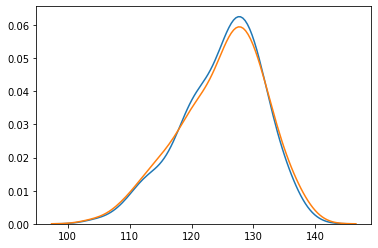

In [15]:
g = sns.distplot(y_pred, hist = False)
g = sns.distplot(y_test, hist = False)
plt.show()